## This plot shows that metabolites selected for the project are among the most abundant ones in E.Coli

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif',
             'sans-serif':['Arial'],
             'size':12})
rc('pdf', fonttype=42)
rc('ps', fonttype=42)

- Inputs

In [2]:
p_root_dir = Path.cwd().parents[1]
p_analysis = p_root_dir / r"6_figures/figure_2/absolute_abundance"

# Compunds used in the study
p_compounds = p_root_dir / r"5_data/metadata/compounds_ids.csv"

# Mapping to absolute metabolite abundance in E.Coli (Bennett, ... , Rabinowitz, 2009)
p_abundance = p_analysis / "absolute_abundance.csv"

# Classification
p_classification = p_root_dir / r"5_data/custom_classification/custom_classification_v2.csv"

# Output
p_out = p_analysis

- Load data

In [3]:
compounds = pd.read_csv(p_compounds, index_col='internal_id')
compounds = compounds[compounds.hmdb_primary != 'custom'][['name_short', 'hmdb_primary']]

abundance = pd.read_csv(p_abundance)
abundance['logC'] = np.log10(abundance["Concentration / M"])
abundance['Concentration / mM'] = abundance["Concentration / M"]*1000
abundance['covered'] = ~abundance.name_short.isna()
abundance.sort_values(by="Concentration / M", ascending=False, inplace=True)

- Map classes to the metabolites fro the reference sample

In [4]:
classification = pd.read_csv(p_classification)[['name_short', 'main_coarse_class']]
abundance = abundance.merge(classification, on='name_short', how='left')
abundance.main_coarse_class.fillna('Not included in reference sample', inplace=True)

- Plot detected/not detected

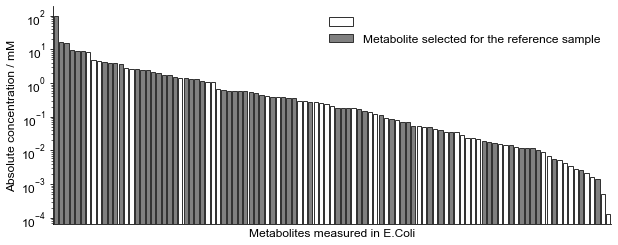

In [6]:
palette = {True:"grey",
           False:"white"} #slategrey

plt.figure(figsize = (10,4))
g = sns.barplot(x="Name in paper", 
                y="Concentration / mM", 
                hue="covered", 
                data=abundance, 
                
                # Bar appearance
                palette=palette,
                dodge=False,
                linewidth=1,
                edgecolor=".2")
# Edit plot area
sns.despine()

# Edit axes
g.set(xticks=[], xlabel='Metabolites measured in E.Coli', ylabel='Absolute concentration / mM')
g.set_yscale('log')
g.tick_params(left=True)

# Edit legend
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, ['','Metabolite selected for the reference sample'], frameon=False)

In [9]:
# g.figure.savefig(p_out / f"abundance_plot.png")
# g.figure.savefig(p_out / f"abundance_plot.pdf", transparent=True)

- Colour reference sample metabs by class

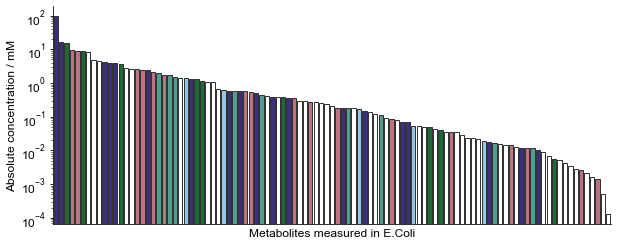

In [7]:
colours = dict({ #Paul Tol palette for colour blindness
     "Amines":'#DDCC77', #yellow
     "Amino acids, peptides, and analogues":'#332288', #blue
     "Carbohydrates":'#117733', #green
     "Carboxylic acids":'#44AA99', #emerald
     "Lipids and lipid-like molecules":'#AA4499', #magenta
     "Nucleosides, nucleotides, and analogues":'#CC6677', #light red
     "Vitamins and cofactors":'#88CCEE', #lightblue
     "Not included in reference sample" : 'white'
    })

abundance.main_coarse_class = pd.Categorical(abundance.main_coarse_class, categories=colours.keys())

plt.figure(figsize = (10,4))
f = sns.barplot(x="Name in paper", 
                y="Concentration / mM", 
                hue="main_coarse_class",
                data=abundance, 
                
                # Bar appearance
                palette=colours,
                dodge=False,
                linewidth=1,
                edgecolor=".2")
# Edit plot area
sns.despine()

# Edit axes
f.set(xticks=[], xlabel='Metabolites measured in E.Coli', ylabel='Absolute concentration / mM')
f.set_yscale('log')
f.tick_params(left=True)

# Edit legend
f.legend_.remove()

In [87]:
f.figure.savefig(p_out / f"abundance_plot_with_class.png")
f.figure.savefig(p_out / f"abundance_plot_with_class.pdf", transparent=True)

- Make a supplementary plot with individual bar names

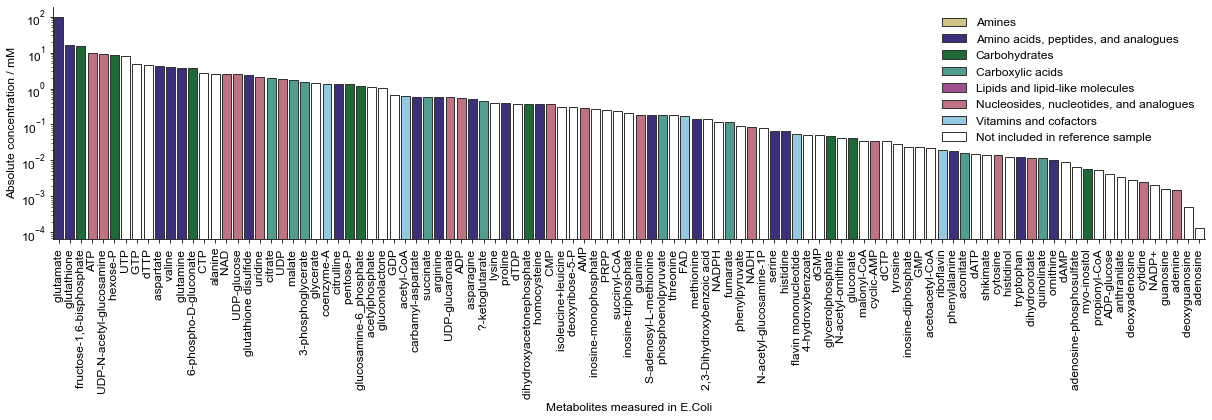

In [8]:
plt.figure(figsize = (17,6))
s = sns.barplot(x="Name in paper", 
                y="Concentration / mM", 
                hue="main_coarse_class",
                data=abundance, 
                
                # Bar appearance
                palette=colours,
                dodge=False,
                linewidth=1,
                edgecolor=".2")
# Edit plot area
sns.despine()

# Edit axes
s.set(xlabel='Metabolites measured in E.Coli', ylabel='Absolute concentration / mM')
s.set_yscale('log')
s.tick_params(left=True)
plt.xticks(rotation=90)
plt.tight_layout()

# Edit legend
s.legend(frameon=False)

In [9]:
s.figure.savefig(p_out / f"abundance_plot_with_class_supplementary.png")
s.figure.savefig(p_out / f"abundance_plot_with_class_supplementary.pdf", transparent=True)